# Time Series Decomposition

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('AirPassengers.csv')

In [3]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df.columns = ['Month', 'nPass']

In [6]:
df.head()

,Month,nPass
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
df['Month'] = pd.to_datetime(df['Month'])

In [8]:
df.dtypes

Month    datetime64[ns]
nPass             int64
dtype: object

In [9]:
df.head()

,Month,nPass
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [10]:
df.index = df['Month']

In [11]:
df

,Month,nPass
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121
...,...,...
1960-08-01,1960-08-01,606
1960-09-01,1960-09-01,508
1960-10-01,1960-10-01,461


In [12]:
C = df.iloc[0:37, :]

In [13]:
C

,Month,nPass
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121
1949-06-01,1949-06-01,135
1949-07-01,1949-07-01,148
1949-08-01,1949-08-01,148
1949-09-01,1949-09-01,136


In [14]:
D = df.iloc[108:, :]
D

,Month,nPass
Month,,
1958-01-01,1958-01-01,340
1958-02-01,1958-02-01,318
1958-03-01,1958-03-01,362
1958-04-01,1958-04-01,348
1958-05-01,1958-05-01,363
1958-06-01,1958-06-01,435
1958-07-01,1958-07-01,491
1958-08-01,1958-08-01,505
1958-09-01,1958-09-01,404


### Drop Month Column

In [15]:
df = df.drop(columns=['Month'])
df.head()

,nPass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Visualize data with Matplotlib

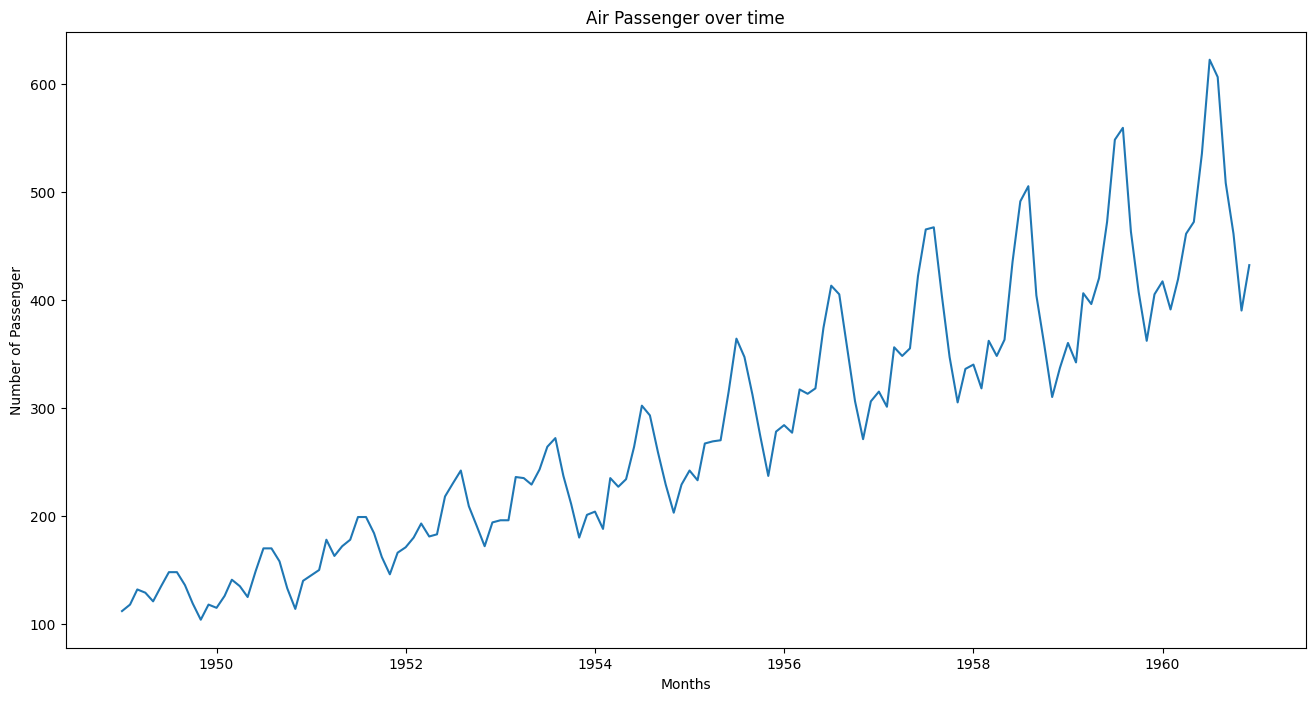

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df['nPass'])
plt.xlabel('Months')
plt.ylabel('Number of Passenger')
plt.title('Air Passenger over time')
plt.show()

### Decompose time series to Seasson, Trend and Residual

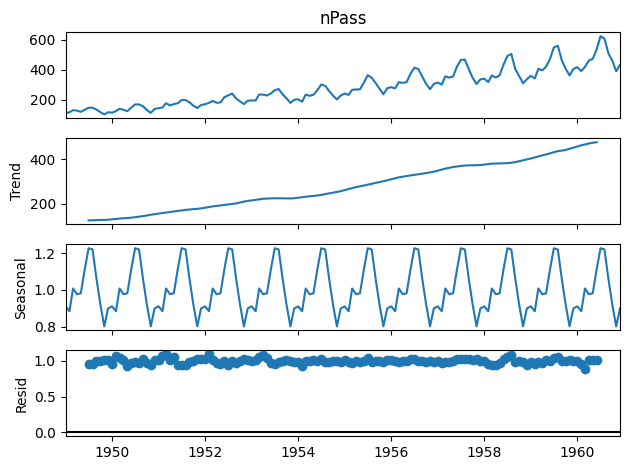

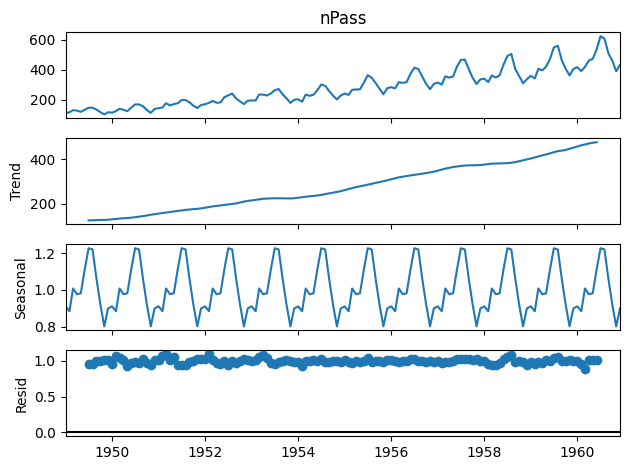

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
Q = seasonal_decompose(df['nPass'], model='mutiplicative')
Q.plot()

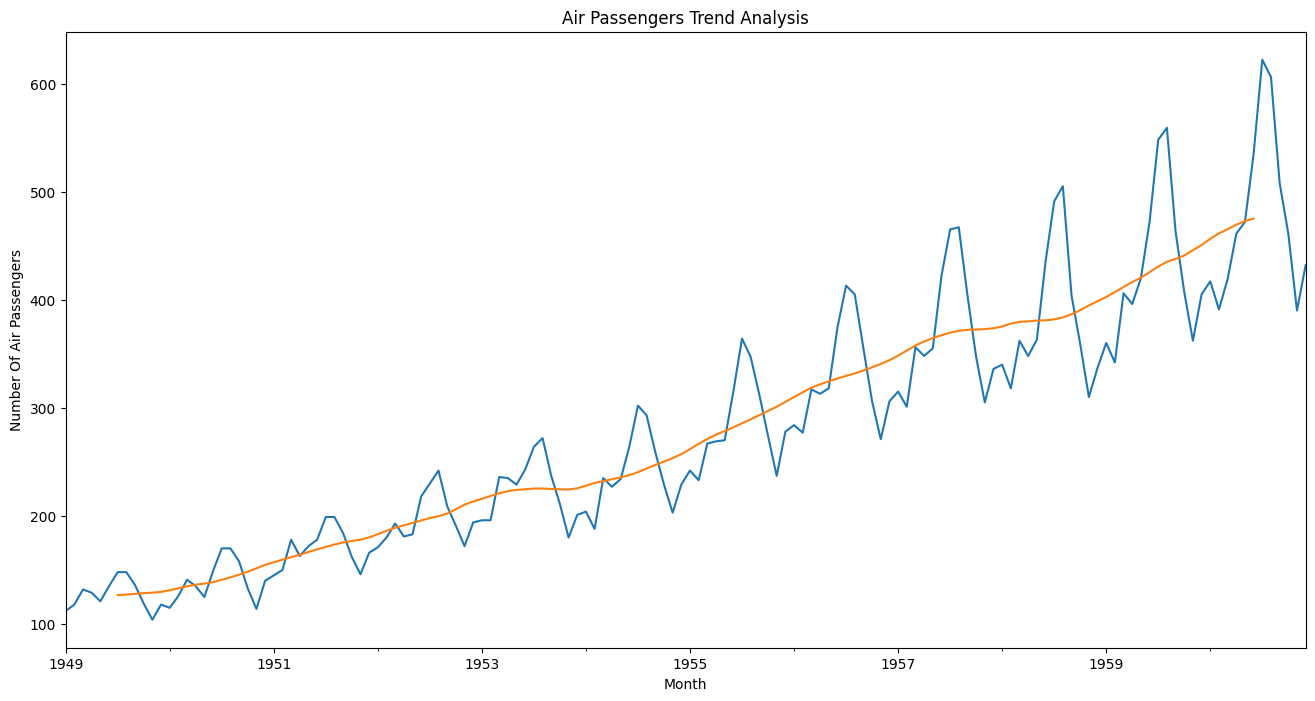

In [18]:
plt.figure(figsize=(16,8))
Q.observed.plot()
Q.trend.plot()
plt.xlabel('Month')
plt.ylabel('Number Of Air Passengers')
plt.title('Air Passengers Trend Analysis')
plt.show()

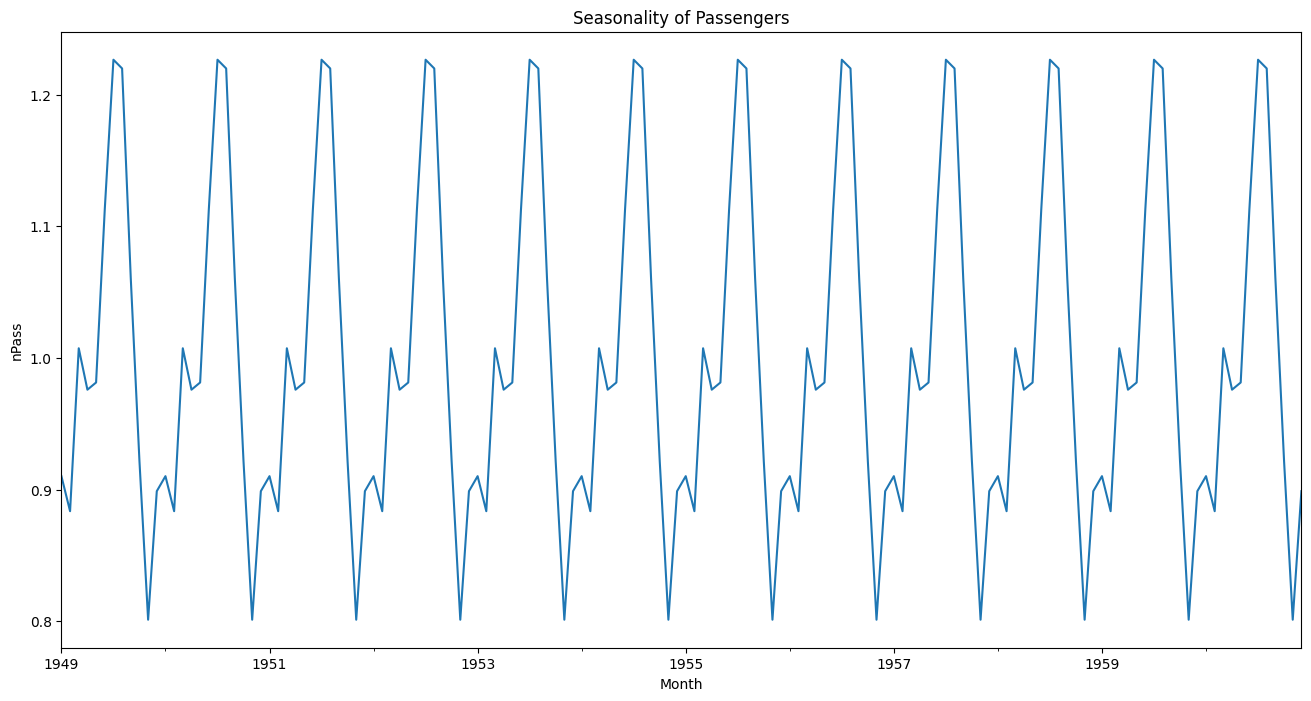

In [19]:
plt.figure(figsize=(16,8))
Q.seasonal.plot()
plt.xlabel('Month')
plt.ylabel('nPass')
plt.title('Seasonality of Passengers')
plt.show()

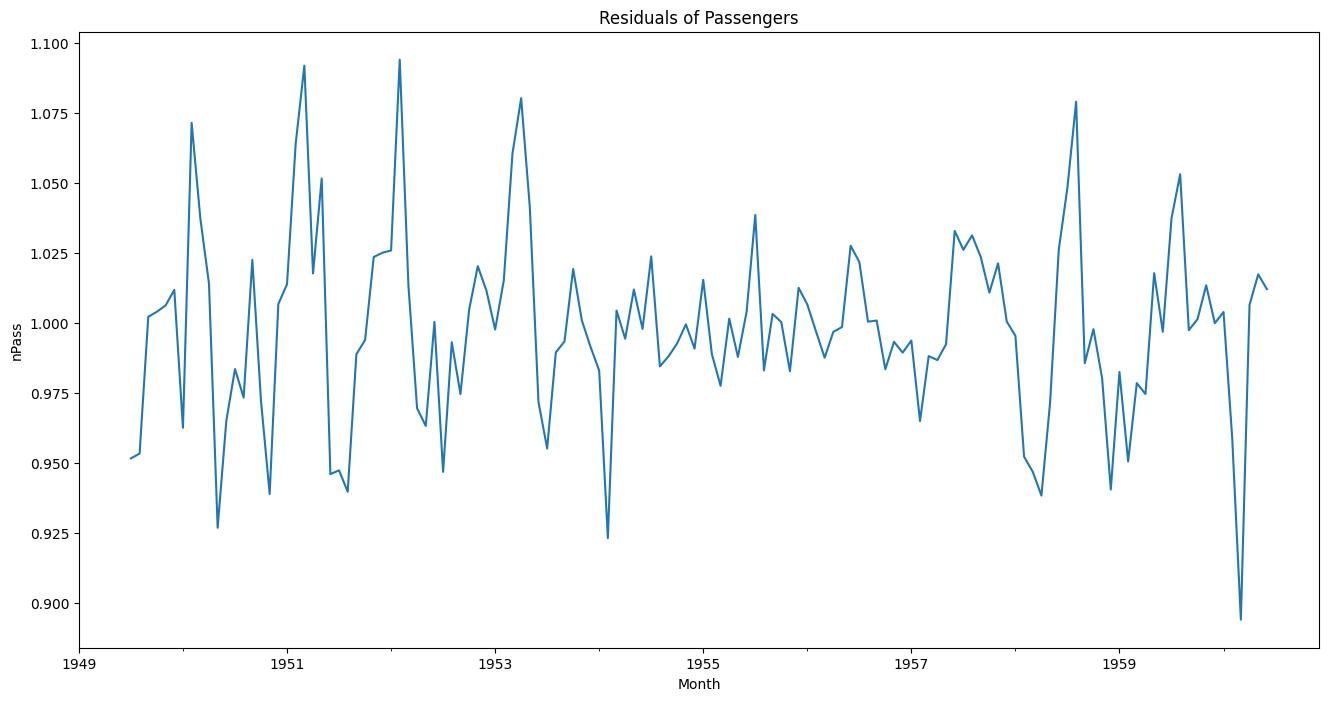

In [20]:
plt.figure(figsize=(16,8))
Q.resid.plot()
plt.xlabel('Month')
plt.ylabel('nPass')
plt.title('Residuals of Passengers')
plt.show()

### Time series forcasting

In [21]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from pmdarima.arima import auto_arima

In [23]:
model = auto_arima(df['nPass'], m=12)

In [24]:
model.order

(2, 1, 1)

In [25]:
p = model.order[0]
d = model.order[1]
q = model.order[2]
print(f'Model Order, p:{p} ; d:{d} ; q:{q}')

Model Order, p:2 ; d:1 ; q:1


### Getting the forecast along with confidence interval

In [26]:
forecast, conf_int = model.predict(n_periods = 36, return_conf_int=True)

In [27]:
forecast

1961-01-01    445.634934
1961-02-01    420.395042
1961-03-01    449.198378
1961-04-01    491.840023
1961-05-01    503.394565
1961-06-01    566.862550
1961-07-01    654.260284
1961-08-01    638.597604
1961-09-01    540.883864
1961-10-01    494.126748
1961-11-01    423.332841
1961-12-01    465.507712
1962-01-01    479.291026
1962-02-01    454.177037
1962-03-01    483.087203
1962-04-01    525.819493
1962-05-01    537.450950
1962-06-01    600.984197
1962-07-01    688.437307
1962-08-01    672.821614
1962-09-01    575.147743
1962-10-01    528.424456
1962-11-01    457.659254
1962-12-01    499.858481
1963-01-01    513.662462
1963-02-01    488.566008
1963-03-01    517.491053
1963-04-01    560.235969
1963-05-01    571.878138
1963-06-01    635.420475
1963-07-01    722.881298
1963-08-01    707.272149
1963-09-01    609.603831
1963-10-01    562.885256
1963-11-01    492.124052
1963-12-01    534.326671
Freq: MS, dtype: float64

In [28]:
forecast = forecast.apply(round)
forecast

1961-01-01    446
1961-02-01    420
1961-03-01    449
1961-04-01    492
1961-05-01    503
1961-06-01    567
1961-07-01    654
1961-08-01    639
1961-09-01    541
1961-10-01    494
1961-11-01    423
1961-12-01    466
1962-01-01    479
1962-02-01    454
1962-03-01    483
1962-04-01    526
1962-05-01    537
1962-06-01    601
1962-07-01    688
1962-08-01    673
1962-09-01    575
1962-10-01    528
1962-11-01    458
1962-12-01    500
1963-01-01    514
1963-02-01    489
1963-03-01    517
1963-04-01    560
1963-05-01    572
1963-06-01    635
1963-07-01    723
1963-08-01    707
1963-09-01    610
1963-10-01    563
1963-11-01    492
1963-12-01    534
Freq: MS, dtype: int64

In [29]:
conf_int

array([[423.34475094, 467.92511658],
       [394.23518302, 446.55490116],
       [419.83140846, 478.56534829],
       [460.37587373, 523.30417201],
       [470.37999658, 536.40913406],
       [532.69880168, 601.02629843],
       [619.22055901, 689.30000963],
       [602.87921604, 674.31599104],
       [504.63055231, 577.13717502],
       [457.44514984, 530.80834643],
       [386.3030106 , 460.36267117],
       [428.19044593, 502.82497842],
       [433.49653884, 525.08551376],
       [405.10774907, 503.24632483],
       [431.15437638, 535.02002912],
       [471.83916844, 579.79981805],
       [481.87209035, 593.02980929],
       [544.15500525, 657.81338881],
       [630.60709073, 746.26752372],
       [614.17741433, 731.46581272],
       [515.83056926, 634.46491613],
       [468.54219966, 588.30671331],
       [397.2952923 , 518.02321528],
       [439.07790127, 560.63906114],
       [446.32509131, 580.99983223],
       [418.31603539, 558.81598086],
       [444.62194643, 590.36015987],
 

In [32]:
lower_conf = conf_int[:, 0 ]
lower_conf

array([423.34475094, 394.23518302, 419.83140846, 460.37587373,
       470.37999658, 532.69880168, 619.22055901, 602.87921604,
       504.63055231, 457.44514984, 386.3030106 , 428.19044593,
       433.49653884, 405.10774907, 431.15437638, 471.83916844,
       481.87209035, 544.15500525, 630.60709073, 614.17741433,
       515.83056926, 468.54219966, 397.2952923 , 439.07790127,
       446.32509131, 418.31603539, 444.62194643, 485.39943994,
       495.4479624 , 557.69634351, 644.08397085, 627.57137805,
       529.13050031, 481.74160891, 410.39065083, 452.0675645 ])

In [33]:
 lower_conf = list(map(round, lower_conf))
lower_conf[0:5]

[423, 394, 420, 460, 470]

In [35]:
upper_conf = conf_int[:, 1]
upper_conf

array([467.92511658, 446.55490116, 478.56534829, 523.30417201,
       536.40913406, 601.02629843, 689.30000963, 674.31599104,
       577.13717502, 530.80834643, 460.36267117, 502.82497842,
       525.08551376, 503.24632483, 535.02002912, 579.79981805,
       593.02980929, 657.81338881, 746.26752372, 731.46581272,
       634.46491613, 588.30671331, 518.02321528, 560.63906114,
       580.99983223, 558.81598086, 590.36015987, 635.07249774,
       648.30831366, 713.1446065 , 801.67862509, 786.97291922,
       690.07716124, 644.02890374, 573.85745237, 616.58577818])

In [36]:
upper_conf = list(map(round, upper_conf))
upper_conf[0:5]

[468, 447, 479, 523, 536]

### Plot the forecast graph along with original data

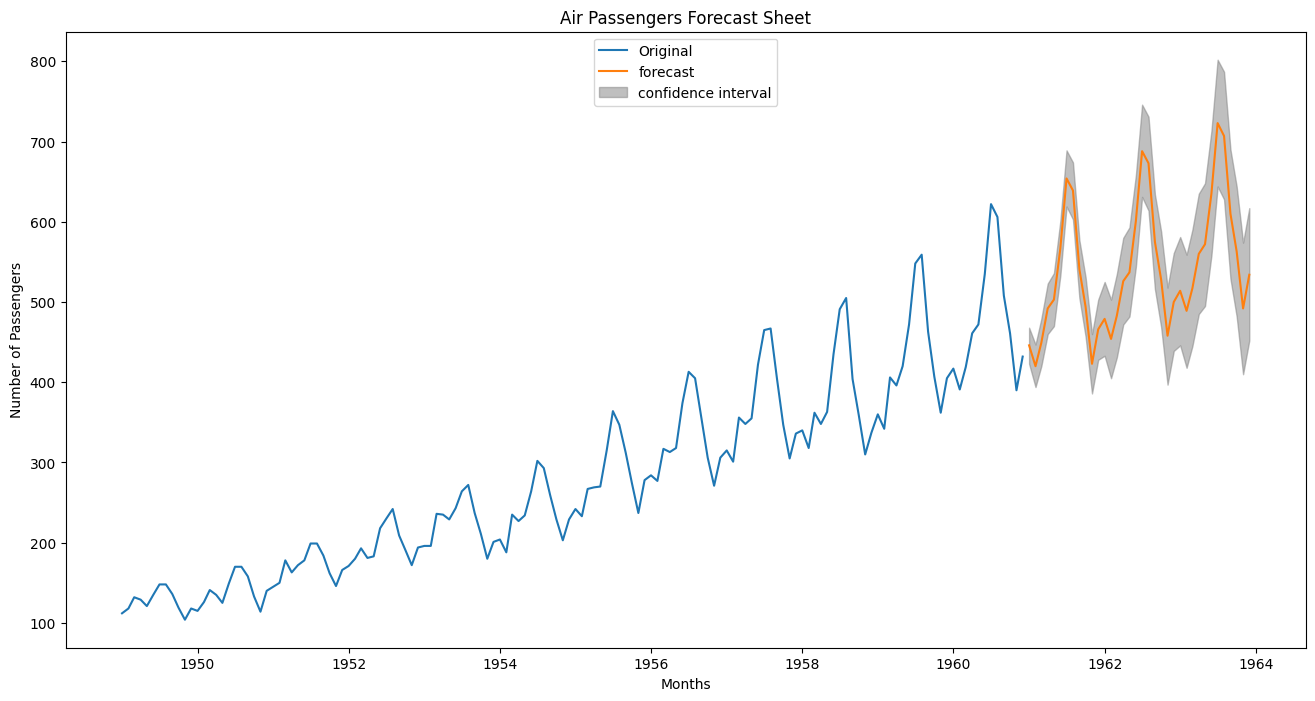

In [37]:
plt.figure(figsize=(16,8))
plt.plot(df['nPass'], label='Original')
plt.plot(forecast, label='forecast')
plt.fill_between(x=forecast.index, y1 = lower_conf, y2= upper_conf, label='confidence interval', color ='gray',alpha= 0.5 )
plt.xlabel('Months')
plt.ylabel('Number of Passengers')
plt.title('Air Passengers Forecast Sheet')
plt.legend(loc='upper center')
plt.show()

### Saving forecast data into dataframe